### Treść

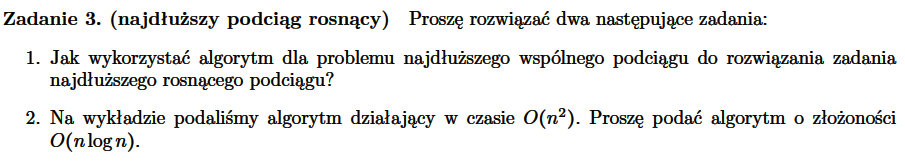

# 1. podpunkt

### Omówienie

W przypadku tego algorytmu, konieczne jest zastosowanie niezmodyfikowanej wersji algorytmu, znajdującego najdłuższy wspólny podciąg. W tym celu, musimy utworzyć w jakiś sposób ten drugi podciąg. Najlepiej jest zatem skopiować ciąg wejściowy i go posortować. Wówczas, jak można zauważyć, najdłuższym wspólnym podciągiem dla ciągu wejściowego oraz ciągu, który otrzymaliśmy po jego posortowaniu, będzie najdłuższy podciąg rosnący (bo posortowany podciąg wymusza rosnącą kolejność elementów - tzn. konieczne jest odfiltrowanie powtarzających się wartości w procesie filtrowania, ponieważ szukamy podciagu rosnącego, a nie niemalejącego).
<br><br>
Dokładne wyjaśnienie tutaj: <br>
LINK: https://www.geeksforgeeks.org/longest-increasing-subsequence-using-longest-common-subsequence-algorithm/

### Implementacja

In [1]:
def lcs(A, B):
    n = len(A)
    m = len(B)
    F = [[0] * m for _ in range(n)]
    
    F[0][0] = int(A[0] == B[0])
    
    for j in range(1, m):
        if F[0][j - 1] or A[0] == B[j]:
            F[0][j] = 1

    for i in range(1, n):
        if F[i - 1][0] or B[0] == A[i]:
            F[i][0] = 1
        
    for i in range(1, n):
        for j in range(1, m):
            if A[i] == B[j]:
                # Take the new character and the previous lcs
                F[i][j] = F[i - 1][j - 1] + 1
            else:
                # Tak the best of previous two possible lcs
                F[i][j] = max(F[i - 1][j], F[i][j - 1])
                
    return F[n - 1][m - 1]


def lis(A):
    if not A: return A
    B = create_second_sequence(A)
    return lcs(A, B)
    
    
def create_second_sequence(A):
    A_sorted = [*A]
    # Sort an array
    quick_sort(A_sorted)
    # Filter out repeated values
    A_cp = [A_sorted[0]]
    for i in range(1, len(A)):
        if A_sorted[i] != A_sorted[i - 1]:
            A_cp.append(A_sorted[i])
    return A_cp
    

def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [2]:
a = [3, 1, 5, 7, 2, 4, 9, 3, 17, 3]
print(lis(a))

5


### (Dodatkowo) odtwarzanie wyniku

Konieczne jest zmodyfikowanie funkcji $ lcs $ tak, aby funkcja $ lcs $ zwracała tablicę, na której pracowała, aby możliwe było odtworzenie podciągu.

In [3]:
def lcs(A, B):
    n = len(A)
    m = len(B)
    F = [[0] * m for _ in range(n)]
    
    F[0][0] = int(A[0] == B[0])
    
    for j in range(1, m):
        if F[0][j - 1] or A[0] == B[j]:
            F[0][j] = 1

    for i in range(1, n):
        if F[i - 1][0] or B[0] == A[i]:
            F[i][0] = 1
        
    for i in range(1, n):
        for j in range(1, m):
            if A[i] == B[j]:
                # Take the new character and the previous lcs
                F[i][j] = F[i - 1][j - 1] + 1
            else:
                # Tak the best of previous two possible lcs
                F[i][j] = max(F[i - 1][j], F[i][j - 1])
                
    return F


def get_lcs(A, B):
    F = lcs(A, B)
    n = len(A)
    m = len(B)
    length = F[n - 1][m - 1]
    if not length: return []
    R = [None] * length
    
    i = n - 1
    j = m - 1
    k = length - 1
    while i >= 0 and j >= 0:
        if A[i] == B[j]:
            R[k] = A[i]
            k -= 1
            i -= 1
            j -= 1
        elif F[i - 1][j] < F[i][j - 1]:
            j -= 1
        else:
            i -= 1
            
    if R[0] is None:
        for i in range(n):
            if F[i][0]: R[0] = B[0]; break
        else:
            for j in range(m):
                if F[0][j]: R[0] = A[0]; break        
            
    return R


def lis(A):
    if not A: return A
    B = create_second_sequence(A)
    return get_lcs(A, B)


def create_second_sequence(A):
    A_sorted = [*A]
    # Sort an array
    quick_sort(A_sorted)
    # Filter out repeated values
    A_cp = [A_sorted[0]]
    for i in range(1, len(A)):
        if A_sorted[i] != A_sorted[i - 1]:
            A_cp.append(A_sorted[i])
    return A_cp
    

def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [4]:
a = [3, 1, 5, 7, 2, 4, 9, 3, 17, 3]
print(lis(a))

[1, 5, 7, 9, 17]


In [5]:
print(lis([0]))

[0]


In [6]:
print(lis([]))

[]


In [7]:
from random import randint
a = [randint(0, 100) for _ in range(randint(0, 25))]
print('Input:', a)
res = lis(a)
print('LIS:  ', res)
print('Ok?:', sorted(res) == res)

Input: [67, 42, 61, 2, 77, 9, 45, 96, 32, 27, 47, 20]
LIS:   [42, 61, 77, 96]
Ok?: True


# 2. podpunkt

### Omówienie (wstępne)

###### Szczegółowe omówienie tutaj: <br>
LINK: https://cp-algorithms.com/sequences/longest_increasing_subsequence.html <br><br>
W poniższym algorytmie wykorzystujemy nieco inne podejście. Zamiast przechowywać długość najdłuższego podciągu, który kończy się wartością $ A[i] $, gdzie $ A $ - tablica wyjściowa, w tym przypadku przechowujemy w pomocniczej tablicy wartości końcowe ciągów. Dokładniej, to w pomocniczej tablicy pod indeksem $ i $ znajdzie się zawsze ostatni wyraz podciągu rosnącego, którego długość wynosi dokładnie $ i $. Z tego powodu pod zerowym indeksem umieszczamy wartość $ -\infty $, ponieważ ciąg o długości $ 0 $ nie może się kończyć żadną wartością, bo jest to ciąg pusty. Dlaczego akurat $ -\infty $? Aby to wyjaśnić, musimy omówić najpierw, w jaki sposób jest aktualizowana tablica pomocnicza. 
###### Zastosowanie tablicy pomocniczej:
Interesuje nas jedynie jeden ciąg, który jest najdłuższym podciagiem rosnącym. Może być wiele podciągów o tej samej długości, ale nas one nie obchodzą w tym zadaniu (tzn. chcemy znaleźć długość najdłuższego podciągu lub sam podciąg o największej długości, nieważne który, jeżeli jest ich kilka). Musimy sobie również zdać sprawę, że w tym rozwiązaniu nie jest możliwe odtworzenie właściwego podciągu, w taki sposób, jak mogliśmy to zrobić wyżej (sposób, jaki wymyśliłem na pozyskanie rozwiązania w przypadku algorytmu o złożoności $ O(n \cdot log(n)) $ został przedstawiony niżej). Jest to efektem tego, że na bieżąco modyfikowana jest tablica tymczasowych wartości końcowych w taki sposób, że dana wartość zostaje zastąpiona nową tylko wtedy, gdy później w tablicy (którą otrzymaliśmy na wejściu, traktowanej jako ciąg, w którym szukamy najdłuższego podciągu) znaleźliśmy wartość od niej mniejszą i równocześnie poprzednia wartość do zamienianej (w tymczasowej tablicy) jest od niej mniejsza oraz następna jest od niej większa. Chodzi o to, że jeżeli uda nam się znaleźć taką wartość, którą da się umieścić między dwoma końcami znalezionych wcześniej podciągów rosnących, to możemy większą wartość końcową zastąpić tą nową wartością (możemy przedłużyć jeden z podciągów, którego koniec mamy zapisany w tymczasowej tablicy). Robimy tak, bo nowo znaleziona wartość utworzy podciąg rosnący o takiej samej długości jak zastępowana większa wartość i jednocześnie wciąż mamy pewność, że wszystkie zapisane dalej w tablicy pomocniczej wartości są od niej większe, więc są końcami DŁUŻSZYCH podciągów rosnących (innymi słowy, ta zamiana wartości nam nic nie psuje, jeżeli chodzi o wyznaczone końce pozostałych podciągów).
###### A dlaczego w ogóle zamieniamy tę wartość?
Powód jest jeden, mniejsza wartość, zapisana jako wartość końcowa podciągu o pewnej długości $ i $, w przypadku, gdy istnieje kilka podciągów o długości $ i $, które mogą kończyć się różnymi wartościami, daje nam większą szansę na znalezienie podciągu dłuższego niż obecnie najdłuższy, ponieważ w momencie znalezienia wartości większej od tej, którą ostatnio zapisaliśmy wewnątrz tablicy pomocniczej, która jest jednocześnie mniejsza od wartości zapisanej pod następnym indeksem (tj. $ i + 1 $), możemy wówczas zamienić wartość pod indeksem $ i + 1 $ na tę nową wartość, dzięki czemu niejako przedłużymy podciąg, którego ostatnim elementem była wartość z pola o indeksie $ i $ (a stała się nią nowa wartość z pola o indeksie $ i + 1 $). W ten sposób zwiększamy szansę na znalezienie kolejnej wartości, która jest większa od końcowej, w celu przedłużenia tego podciągu (w skrócie: jeżeli mamy kilka podciągów rosnących o tej samej długości, lepiej jest trzymać w pamięci koniec tego, który kończy się najmniejszą wartością, ponieważ dla niego najszybciej znajdziemy wartość, która będzie w stanie go przedłużyć).
###### A jak w takim razie przedłużamy najdłuższy pociąg?
Tutaj rozwiązanie jest już proste. Jeżeli znajdziemy wartość, która jest wartością większą od wartości końcowej obecnie najdłuższego podciągu rosnącego, możemy tę wartość dołączyć do tego podciągu.

### Implementacja wstępna
#### (Aby zauważyć sposób działania - złożoność $ O(n^2) $)

In [8]:
def lis(arr):
    if len(arr) < 2: return len(arr)
    
    n = len(arr)
    last = [float('inf')] * (n + 1)
    last[0] = float('-inf')
    
    for i in range(n):
        for j in range(1, n + 1):
            if last[j - 1] < arr[i] < last[j]:
                last[j] = arr[i]
    
    print(last)
    
    for i in range(n, 0, -1):
        if last[i] < float('inf'):
            return i
    return 0

###### Kilka testów

In [9]:
a = [3, 1, 5, 7, 2, 4, 9, 3, 17, 3]
lis(a)

[-inf, 1, 2, 3, 9, 17, inf, inf, inf, inf, inf]


5

### Omówienie (usprawnienia)

Po analizie tego, w jaki sposób zapisujemy w pomocniczej tablicy wartości, łatwo dojdziemy do wniosku, że tablica końcowych wartości znalezionych podciągów rosnących zawsze zawiera wartości posortowane w sposób rosnący (bo aby ciąg był dłuższy, musi się kończyć większą wartością - logiczne). Z tego porządku wynika fakt, iż nie musimy przeglądać tej tablicy liniowo. W każdym algorytmie, gdzie modyfikacji ma zostać poddana tylko jedna wartość w danym momencie z posortowanej tablicy i mamy pewność, że jest to wartość unikalna (tu wszystkie są unikalne - nie ma powtórek), możemy znaleźć indeks tej wartości, przy pomocy <ins>**wyszukiwania binarnego**</ins>. Dzięki temu czas działania algorytmu schodzi do $ O(n \cdot log(n)) $.
<br><br>
Kolejne usprawnienia dotyczą pamięci. Jak można zauważyć, niepotrzebnie zawsze trzymamy w tablicy $ n $ wartości, gdy tak naprawdę zazwyczaj istnieje podciąg, którego długość jest znacznie mniejsza od długości ciągu wejściowego. Jeżeli zależy nam na pamięci, wystarczy przedłużać tablicę tylko wtedy, gdy natrafimy na wartość, która jest obecnie największa.

In [10]:
def binary_search(arr, val):
    left_idx = 0
    right_idx = len(arr) - 1
    
    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        if val > arr[mid_idx]:
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx - 1

    return left_idx  # It will never exceed the left side of an array


def lis(arr):
    if len(arr) < 2: return len(arr)
    
    n = len(arr)
    last = []
    
    for i in range(n):
        j = binary_search(last, arr[i])
        if j == len(last): last.append(arr[i])
        else: last[j] = arr[i]
    
    print(last)
    
    return len(last)

###### Kilka testów

In [11]:
a = [3, 1, 5, 7, 2, 4, 9, 3, 17, 3]
lis(a)

[1, 2, 3, 9, 17]


5